<a href="https://colab.research.google.com/github/dhananjay417/SecondRepo/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir images

In [2]:
!pip install ipython-autotime
%load_ext autotime


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.7 MB/s eta 0:00:00
time: 413 µs (started: 2023-05-02 19:14:04 +00:00)


In [3]:
from google.colab import drive

time: 487 µs (started: 2023-05-02 19:14:34 +00:00)


In [4]:
drive.mount('/content/drive')

Mounted at /content/drive
time: 23.3 s (started: 2023-05-02 19:14:37 +00:00)


In [5]:
#preprocessing

import os 
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/Image Classification/CNN Model 2/train'
CATEGORIES = ['Biological','Fibres','Films_Coated_Surface','Porous_Sponge']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


time: 1min 16s (started: 2023-05-02 19:15:17 +00:00)


In [6]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

time: 5.91 ms (started: 2023-05-02 19:18:13 +00:00)


<BarContainer object of 4 artists>

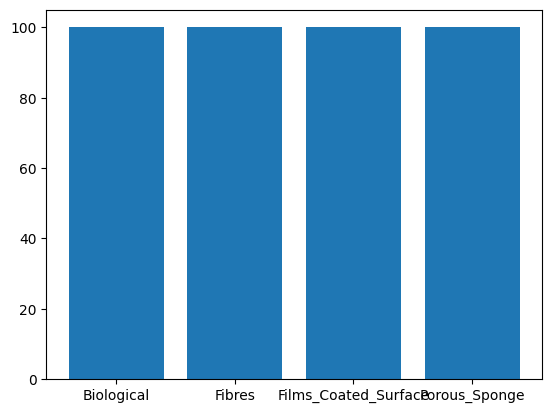

time: 201 ms (started: 2023-05-02 19:18:17 +00:00)


In [7]:
unique,count = np.unique(target,return_counts= True)
plt.bar(CATEGORIES,count)

In [8]:
# Split data for training ans testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, target,
                                            test_size=0.3, random_state = 109)

time: 254 ms (started: 2023-05-02 19:18:22 +00:00)


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000], 'kernel':['linear']},
              {'C':[1,10,100,1000], 'gamma':[0.001,0.0001], 'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 24min 52s (started: 2023-05-02 19:18:26 +00:00)


In [10]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 2, 2, 0, 2, 1, 2, 3, 0, 0, 1, 2, 3, 0, 3, 0, 1, 2, 1, 2, 0,
       0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       1, 0, 3, 0, 1, 0, 2, 3, 0, 2, 0, 2, 1, 1, 2, 2, 0, 1, 1, 3, 0, 2,
       0, 0, 0, 3, 1, 2, 1, 1, 0, 3, 0, 1, 0, 2, 3, 2, 0, 1, 0, 3, 3, 3,
       2, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 3, 0, 2, 0, 0, 3])

time: 4.47 s (started: 2023-05-02 19:45:06 +00:00)


In [11]:
y_test

array([1, 0, 2, 2, 0, 2, 1, 2, 3, 1, 0, 2, 2, 3, 0, 3, 0, 1, 2, 1, 0, 0,
       2, 0, 2, 0, 2, 1, 0, 2, 1, 0, 0, 0, 3, 0, 2, 0, 0, 2, 3, 3, 0, 2,
       1, 1, 3, 1, 1, 0, 2, 3, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 3, 3, 1, 2,
       0, 0, 2, 3, 1, 2, 1, 1, 0, 3, 1, 2, 1, 2, 3, 2, 1, 3, 3, 3, 3, 3,
       3, 2, 1, 0, 1, 0, 0, 2, 1, 1, 3, 0, 3, 1, 1, 1, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 1, 3, 1, 2, 1, 3, 3])

time: 3.44 ms (started: 2023-05-02 19:45:14 +00:00)


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

time: 368 µs (started: 2023-05-02 19:45:17 +00:00)


In [13]:
accuracy_score(y_pred,y_test)

0.7166666666666667

time: 6.78 ms (started: 2023-05-02 19:45:20 +00:00)


In [14]:
confusion_matrix(y_pred,y_test)

array([[25, 13,  2,  3],
       [ 1, 18,  2,  3],
       [ 6,  0, 29,  4],
       [ 0,  0,  0, 14]])

time: 4.57 ms (started: 2023-05-02 19:45:22 +00:00)


In [15]:
#save the model using pickle library

time: 328 µs (started: 2023-05-02 19:45:24 +00:00)


In [19]:
import pickle
pickle.dump(clf,open('img_model.pkl','wb'))

time: 625 ms (started: 2023-05-02 19:56:23 +00:00)


In [20]:
model = pickle.load(open('img_model.pkl','rb'))

time: 182 ms (started: 2023-05-02 19:56:28 +00:00)


Enter your URL/content/drive/MyDrive/Image Classification/CNN Model 2/train/Porous_Sponge/L0_099fd258fa7436a86f7f780ea8f73e60.jpg
(768, 1024, 3)
Predicted output : Porous_Sponge


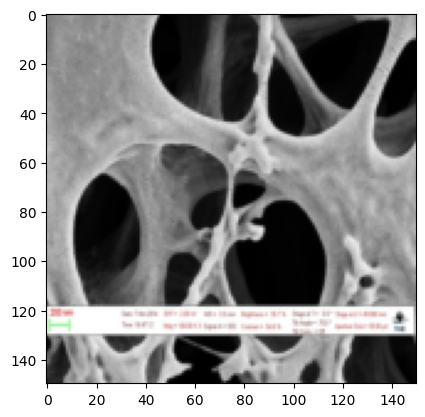

time: 18.8 s (started: 2023-05-02 19:45:31 +00:00)


In [18]:
from skimage.io import imread
import numpy as np
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted output : {y_out}')

In [29]:
!pip install -U ipykernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel~=5.5.6, but you have ipykernel 6.22.0 which is incompatible.
time: 10.1 s (started: 2023-05-02 21:20:36 +00:00)


In [34]:
!pip install streamlit -q

time: 4.65 s (started: 2023-05-02 21:36:09 +00:00)


In [43]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.set_option('deprecation.showfileUploaderEncoding', False)

st.title('Micrograph Classifier using Machine learning')
st.text('Upload the Image')

model = pickle.load(open('img_model.pkl','rb'))
uploaded_file = st.file_uploader("choose an image...", type ="jpg")

if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption = 'Uploaded image')

  if st.button('PREDICT'):
    CATEGORIES = ['Biological','Fibres','Films_Coated_Surface','Porous_Sponge']
    st.write('Result...')
    flat_data =[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.write(f'Predicted output : {y_out}')

Overwriting app.py
time: 1.16 ms (started: 2023-05-02 22:09:03 +00:00)


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] | fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.141.255.228:8501

npx: installed 22 in 3.029s
your url is: https://long-camels-train-34-141-255-228.loca.lt
